## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

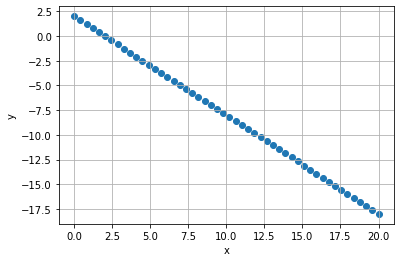

In [4]:
plt.scatter(X,y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [5]:
def GD_SV(x,y,alpha,iterations):
    theta_0 = 0
    theta_1 = 0
    loss = []
    th_0 = []
    th_1 = []
    output = []
    for i in range(0,iterations):
        print(f"****************** Iteration {i} ********************")
        h = theta_0 + theta_1 * X 
        print(f"h(x):{h} \n")

        error = h - y
        MSE = error @ error /(2*len(error))
        print(f"Error Vector: {error} \n")
        print(f"j = {MSE} \n")
        
        
        
        if i > 0 and abs(MSE - loss[i-1]) < 0.01:
            break

        d_theta_0 = np.sum(error)/len(error)
        d_theta_1 = error @ X / len(error)
        print(f"d_theta_0 : {d_theta_0}")
        print(f"d_theta_1 : {d_theta_1}")

        GV = np.array([[d_theta_0],[d_theta_1]])
        GVN = np.linalg.norm(GV,2)
        print(f"Gradient Vector:{GV} \n")
        print(f"Gradient Vector Norm: {GVN} \n")

        if GVN < 0.01:
            break

        theta_0 = theta_0 - alpha*d_theta_0
        theta_1 = theta_1 - alpha*d_theta_1
        print(f"theta_0_new : {theta_0} \n")
        print(f"theta_1_new : {theta_1} \n")
        
        loss.append(MSE)
        output.append(h)
        th_0.append(theta_0)
        th_1.append(theta_1)
    epochs = np.arange(i)
        
    return th_0,th_1,loss,output,epochs

def plot_line(x, y, xlabel, ylabel, style, *title):
    plt.plot(x, y, style)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.show()
def plot_lines(x, y, y_hat, xlabel, ylabel, style):
    plt.scatter(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    for i in range(len(y_hat)):
        plt.plot(x, y_hat[i], style)
    plt.show()
def plot_best_fit(x, y, y_hat, xlabel, ylabel, style):
    plt.scatter(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x, y_hat[-1], style)
    plt.grid()
    plt.show()

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [6]:
t0,t1,loss,output,epochs = GD_SV(X,y,0.0005,300)

****************** Iteration 0 ********************
h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

Error Vector: [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ] 

j = 49.34693877551021 

d_theta_0 : 8.0
d_theta_1 : 114.69387755102042
Gradient Vector:[[  8.        ]
 [114.69387755]] 

Gradient Vector Norm: 114.97254258164628

In [8]:
from sklearn.metrics import r2_score

r2_score(y,output[-1])

0.9649213414082953

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

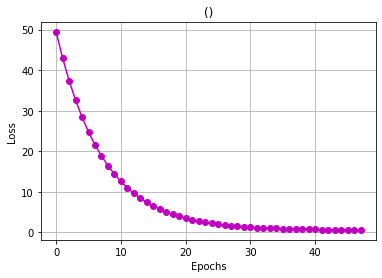

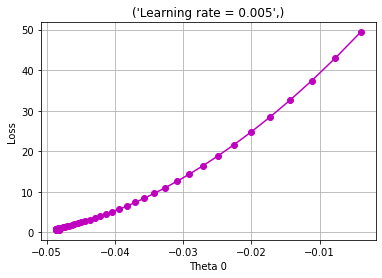

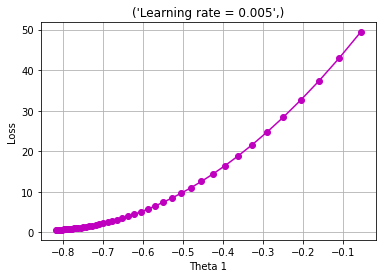

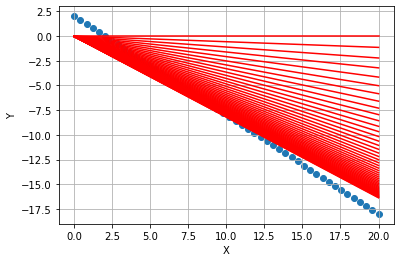

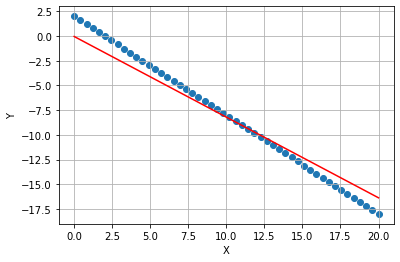

In [9]:
plot_line(epochs, loss, 'Epochs', 'Loss','-om')
plot_line(t0, loss, 'Theta 0', 'Loss','-om','Learning rate = 0.005')
plot_line(t1, loss, 'Theta 1', 'Loss','-om','Learning rate = 0.005')
plot_lines(X, y, output,'X','Y','r')
plot_best_fit(X, y,output,'X','Y','r')

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [10]:
def GD_SV_Momentum(x,y,alpha,gamma,iterations):
    theta_0 = 0
    theta_1 = 0
    m_0 = 0
    m_1 = 0
    loss = []
    th_0 = []
    th_1 = []
    output = []
    for i in range(0,iterations):
        print(f"****************** Iteration {i} ********************")
        h = theta_0 + theta_1 * X 
        print(f"h(x):{h} \n")

        error = h - y
        MSE = error @ error /(2*len(error))
        print(f"Error Vector: {error} \n")
        print(f"j = {MSE} \n")
        
        
        
        if i > 0 and abs(MSE - loss[i-1]) < 0.01:
            break

        d_theta_0 = np.sum(error)/len(error)
        d_theta_1 = error @ X / len(error)
        print(f"d_theta_0 : {d_theta_0}")
        print(f"d_theta_1 : {d_theta_1}")

        GV = np.array([[d_theta_0],[d_theta_1]])
        GVN = np.linalg.norm(GV,2)
        print(f"Gradient Vector:{GV} \n")
        print(f"Gradient Vector Norm: {GVN} \n")

        if GVN < 0.01:
            break
        
        #Momentum
        m_0 = gamma*m_0 + alpha*d_theta_0
        m_1 = gamma*m_1 + alpha*d_theta_1

        theta_0 = theta_0 - m_0
        theta_1 = theta_1 - m_1
        print(f"theta_0_new : {theta_0} \n")
        print(f"theta_1_new : {theta_1} \n")
        
        loss.append(MSE)
        output.append(h)
        th_0.append(theta_0)
        th_1.append(theta_1)
    epochs = np.arange(i)
        
    return th_0,th_1,loss,output,epochs

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [11]:
t0,t1,loss,output,epochs = GD_SV_Momentum(X,y,0.0005,0.5,300)

****************** Iteration 0 ********************
h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

Error Vector: [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ] 

j = 49.34693877551021 

d_theta_0 : 8.0
d_theta_1 : 114.69387755102042
Gradient Vector:[[  8.        ]
 [114.69387755]] 

Gradient Vector Norm: 114.97254258164628

In [12]:
r2_score(y,output[-1])

0.9671487153519441

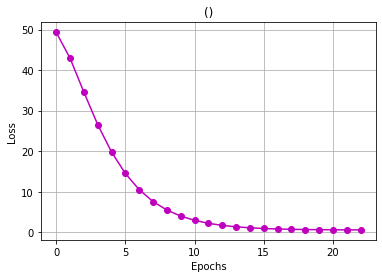

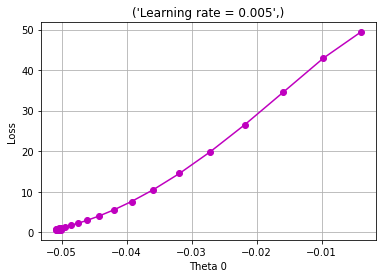

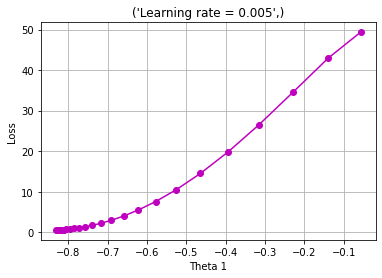

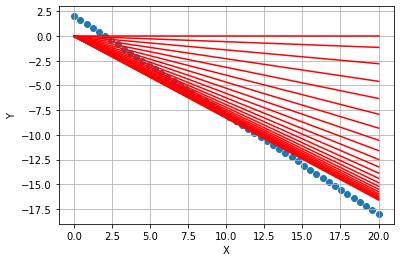

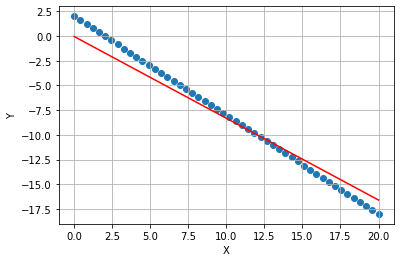

In [13]:
plot_line(epochs, loss, 'Epochs', 'Loss','-om')
plot_line(t0, loss, 'Theta 0', 'Loss','-om','Learning rate = 0.005')
plot_line(t1, loss, 'Theta 1', 'Loss','-om','Learning rate = 0.005')
plot_lines(X, y, output,'X','Y','r')
plot_best_fit(X, y,output,'X','Y','r')

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [14]:
t0,t1,loss,output,epochs = GD_SV_Momentum(X,y,0.0005,0.9,300)

****************** Iteration 0 ********************
h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

Error Vector: [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ] 

j = 49.34693877551021 

d_theta_0 : 8.0
d_theta_1 : 114.69387755102042
Gradient Vector:[[  8.        ]
 [114.69387755]] 

Gradient Vector Norm: 114.97254258164628

In [15]:
r2_score(y,output[-1])

0.9529745965181239

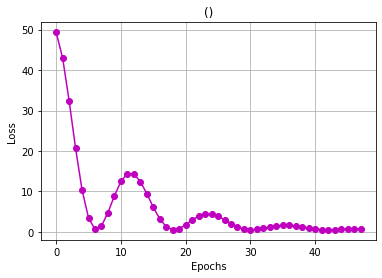

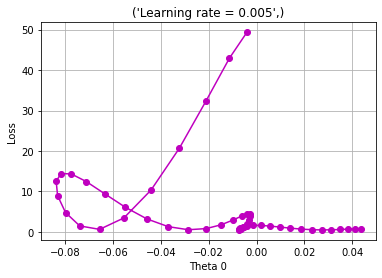

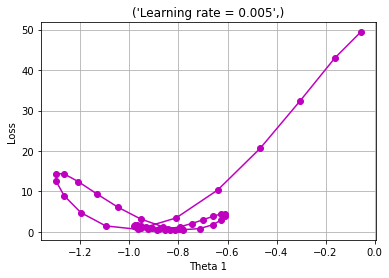

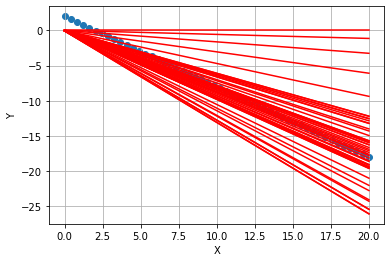

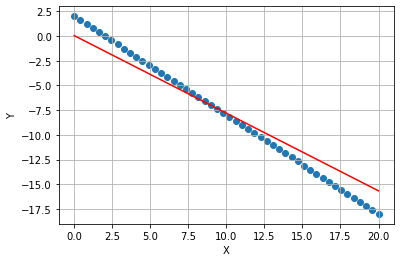

In [16]:
plot_line(epochs, loss, 'Epochs', 'Loss','-om')
plot_line(t0, loss, 'Theta 0', 'Loss','-om','Learning rate = 0.005')
plot_line(t1, loss, 'Theta 1', 'Loss','-om','Learning rate = 0.005')
plot_lines(X, y, output,'X','Y','r')
plot_best_fit(X, y,output,'X','Y','r')

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [17]:
t0,t1,loss,output,epochs = GD_SV_Momentum(X,y,0.0005,0.89,300)

****************** Iteration 0 ********************
h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

Error Vector: [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ] 

j = 49.34693877551021 

d_theta_0 : 8.0
d_theta_1 : 114.69387755102042
Gradient Vector:[[  8.        ]
 [114.69387755]] 

Gradient Vector Norm: 114.97254258164628

In [19]:
r2_score(y,output[-1])

0.9274581564618307

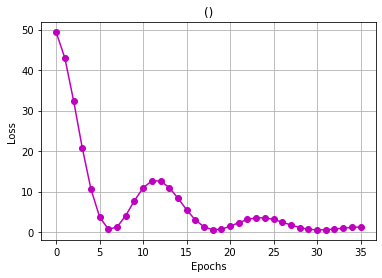

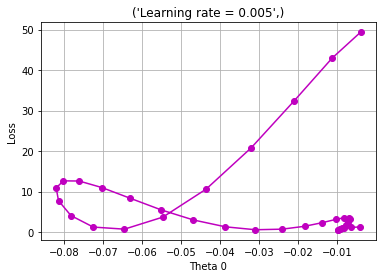

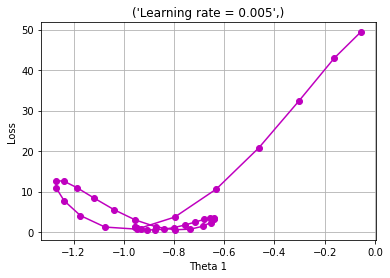

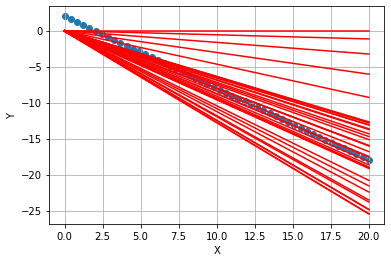

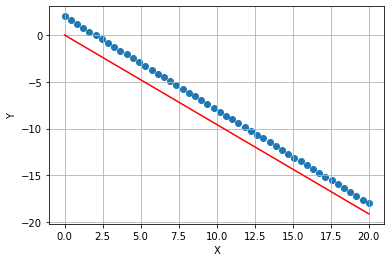

In [18]:
plot_line(epochs, loss, 'Epochs', 'Loss','-om')
plot_line(t0, loss, 'Theta 0', 'Loss','-om','Learning rate = 0.005')
plot_line(t1, loss, 'Theta 1', 'Loss','-om','Learning rate = 0.005')
plot_lines(X, y, output,'X','Y','r')
plot_best_fit(X, y,output,'X','Y','r')

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [22]:
def GD_SV_Momentum(x,y,alpha,gamma,iterations):
    theta_0 = 0
    theta_1 = 0
    m_0 = 0
    m_1 = 0
    loss = []
    th_0 = []
    th_1 = []
    output = []
    for i in range(0,iterations):
        print(f"****************** Iteration {i} ********************")
        h = theta_0 + theta_1 * X 
        print(f"h(x):{h} \n")

        error = h - y
        MSE = error @ error /(2*len(error))
        print(f"Error Vector: {error} \n")
        print(f"j = {MSE} \n")
        
        
        
        if i > 0 and abs(MSE - loss[i-1]) < 0.01:
            break

        d_theta_0 = np.sum(error)/len(error)
        d_theta_1 = error @ X / len(error)
        print(f"d_theta_0 : {d_theta_0}")
        print(f"d_theta_1 : {d_theta_1}")
        
        #NAG
        history_term_0 = gamma*m_0
        theta_temp0 = theta_0 - history_term_0
        history_term_1 = gamma*m_1
        theta_temp1 = theta_1 - history_term_1
        print(f"theta_temp_0 : {theta_temp0}")
        print(f"theta_temp_1 : {theta_temp1}")
        
        ht = theta_temp0+theta_temp1*X
        errort = ht-y
        d_theta_temp0 = np.sum(errort)/len(errort)
        d_theta_temp1 = errort@X/len(errort)

        GV = np.array([[d_theta_temp0],[d_theta_temp1]])
        GVN = np.linalg.norm(GV,2)
        print(f"Gradient Vector:{GV} \n")
        print(f"Gradient Vector Norm: {GVN} \n")

        if GVN < 0.01:
            break
        
        #Momentum
        m_0 = gamma*m_0 + alpha*d_theta_0
        m_1 = gamma*m_1 + alpha*d_theta_1

        #update
        theta_0 = theta_temp0 - alpha*d_theta_temp0
        theta_1 = theta_temp1 - alpha*d_theta_temp1
        print(f"theta_0_new : {theta_0} \n")
        print(f"theta_1_new : {theta_1} \n")
        
        loss.append(MSE)
        output.append(h)
        th_0.append(theta_0)
        th_1.append(theta_1)
    epochs = np.arange(i)
        
    return th_0,th_1,loss,output,epochs

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [23]:
t0,t1,loss,output,epochs = GD_SV_Momentum(X,y,0.0005,0.9,300)

****************** Iteration 0 ********************
h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

Error Vector: [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ] 

j = 49.34693877551021 

d_theta_0 : 8.0
d_theta_1 : 114.69387755102042
theta_temp_0 : 0.0
theta_temp_1 : 0.0
Gradient Vector:[[  8.        ]
 [114.69387755]] 

Gr

In [29]:
r2_score(y,output[-1])

0.9228988388317726

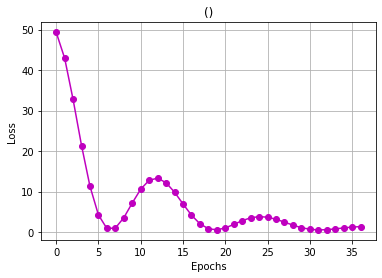

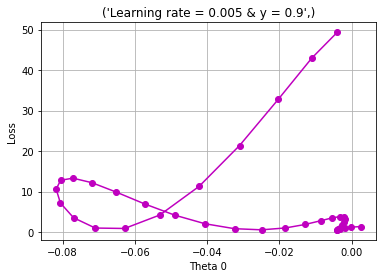

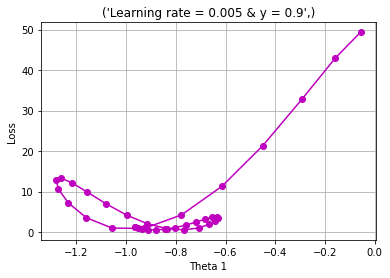

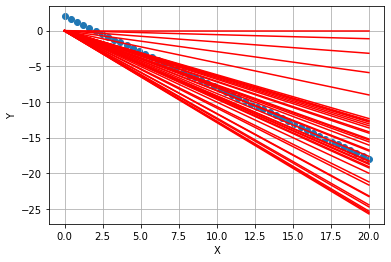

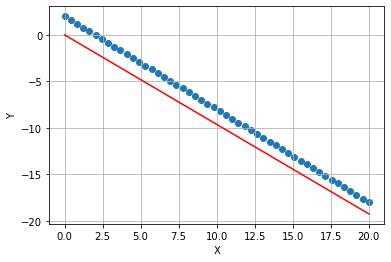

In [25]:
plot_line(epochs, loss, 'Epochs', 'Loss','-om')
plot_line(t0, loss, 'Theta 0', 'Loss','-om','Learning rate = 0.005 & y = 0.9')
plot_line(t1, loss, 'Theta 1', 'Loss','-om','Learning rate = 0.005 & y = 0.9')
plot_lines(X, y, output,'X','Y','r')
plot_best_fit(X, y,output,'X','Y','r')

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [30]:
t0,t1,loss,output,epochs = GD_SV_Momentum(X,y,0.0005,0.89,300)

****************** Iteration 0 ********************
h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 

Error Vector: [-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ] 

j = 49.34693877551021 

d_theta_0 : 8.0
d_theta_1 : 114.69387755102042
theta_temp_0 : 0.0
theta_temp_1 : 0.0
Gradient Vector:[[  8.        ]
 [114.69387755]] 

Gr

In [31]:
r2_score(y,output[-1])

0.9393447852996981

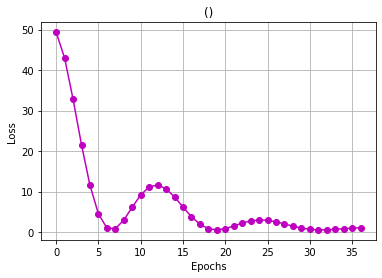

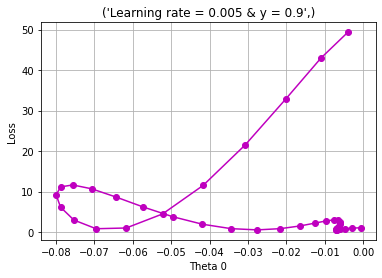

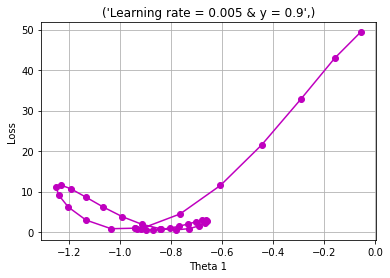

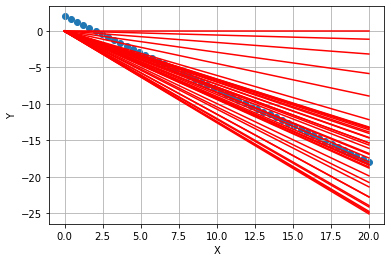

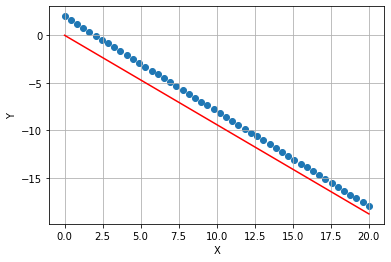

In [32]:
plot_line(epochs, loss, 'Epochs', 'Loss','-om')
plot_line(t0, loss, 'Theta 0', 'Loss','-om','Learning rate = 0.005 & y = 0.9')
plot_line(t1, loss, 'Theta 1', 'Loss','-om','Learning rate = 0.005 & y = 0.9')
plot_lines(X, y, output,'X','Y','r')
plot_best_fit(X, y,output,'X','Y','r')